<h2 align='center' style='color:blue'>Campaign Performance Analysis - Nova Mart</h2>

# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Import Datas

## dim_campaigns

In [70]:
df_campaigns_1 = pd.read_csv(f'{os.getcwd()}/datasets/dim_campaigns.csv')
df_campaigns_1.head()

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [3]:
df_campaigns_1.shape

(2, 4)

In [69]:
df_campaigns_1.start_date.head(1)

0    12-11-2023
Name: start_date, dtype: object

In [68]:
df_campaigns_1.end_date.tail(1)

1    16-01-2024
Name: end_date, dtype: object

## dim_products

In [5]:
df_products_1 = pd.read_csv(f'{os.getcwd()}/datasets/dim_products.csv')
df_products_1.head()

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [6]:
df_products_1.shape

(15, 3)

## dim_stores

In [7]:
df_dim_stores_1 = pd.read_csv(f'{os.getcwd()}/datasets/dim_stores.csv')
df_dim_stores_1.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [8]:
df_dim_stores_1.shape

(50, 2)

### fact_events

In [9]:
df_fact_events_1 = pd.read_csv(f'{os.getcwd()}/datasets/fact_events.csv')
df_fact_events_1.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [10]:
df_fact_events_1.shape

(1500, 9)

# Data Cleaning

## 1. Removes Duplicates

In [11]:
# Count duplicates based on store_id, campaign_id, and product_code
num_duplicates = df_fact_events_1.duplicated(subset=['store_id', 'campaign_id', 'product_code']).sum()

# Remove the duplicate rows
df_fact_events_2 = df_fact_events_1.drop_duplicates(subset=['store_id', 'campaign_id', 'product_code']).copy()

print(f"Removed {num_duplicates} duplicate rows.")

Removed 0 duplicate rows.


## 3. Removes Null

In [12]:
df_fact_events_2.isnull().sum()

event_id                       0
store_id                       0
campaign_id                    0
product_code                   0
base_price(before_promo)       0
quantity_sold(before_promo)    0
promo_type                     0
base_price(after_promo)        0
quantity_sold(after_promo)     0
dtype: int64

In [13]:
df_qty_sold_median = df_fact_events_2['quantity_sold(before_promo)'].median()
df_qty_sold_median

np.float64(78.0)

In [14]:
df_fact_null = df_fact_events_2.loc[df_fact_events_2['quantity_sold(before_promo)'].isna()==True]
df_fact_null.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)


In [15]:
df_fact_null.index

Index([], dtype='int64')

In [16]:
df_fact_events_2.loc[df_fact_events_2.product_code=='P13'].sample(5)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
853,c8035e,STCHE-3,CAMP_SAN_01,P13,350,122.0,BOGOF,175,529
1250,fe72b2,STHYD-3,CAMP_SAN_01,P13,350,133.0,BOGOF,175,337
1064,b8269b,STBLR-1,CAMP_DIW_01,P13,350,77.0,BOGOF,175,232
58,6aae63,STMYS-2,CAMP_DIW_01,P13,350,63.0,BOGOF,175,189
754,c115da,STCHE-2,CAMP_DIW_01,P13,350,84.0,BOGOF,175,293


In [17]:
df_fact_events_2['quantity_sold(before_promo)'] = df_fact_events_2['quantity_sold(before_promo)'].fillna(df_qty_sold_median)

In [18]:
df_fact_events_2.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


# Exploratory Data Analysis

## 2. How many cities have more than 5 stores?

In [19]:
result = df_dim_stores_1['city'].value_counts().loc[lambda x: x > 5]
result

city
Bengaluru    10
Chennai       8
Hyderabad     7
Name: count, dtype: int64

## 5. Total Quantity Sold BOGOF during Diwali

### Merge all dataset

#### event x store

In [20]:
df_merge_1 = pd.merge(df_fact_events_2,df_dim_stores_1,on='store_id')
df_merge_1.head(2)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai


#### event x product 

In [21]:
df_merge_1 = pd.merge(df_merge_1,df_products_1,on='product_code')
df_merge_1.head(2)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples


#### event x campaigns

In [22]:
df_merge_1 = pd.merge(df_merge_1,df_campaigns_1,on='campaign_id').drop('campaign_id',axis=1)
df_merge_1.head(2)

,event_id,store_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024


#### reset_index

In [23]:
df_merge_1 = df_merge_1.reset_index(drop=True).set_index('event_id')
df_merge_1.head(2)

,store_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
event_id,,,,,,,,,,,,,
8481be,STCHE-1,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
20618e,STCHE-3,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024


#### cast to datetime

In [24]:
df_merge_1 = df_merge_1.astype({
    'start_date': 'datetime64[ns]',
    'end_date': 'datetime64[ns]'
})
df_merge_1.head()

,store_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
event_id,,,,,,,,,,,,,
8481be,STCHE-1,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,2023-12-11,2023-11-18
20618e,STCHE-3,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,2024-10-01,2024-01-16
f30579,STBLR-9,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,2023-12-11,2023-11-18
4f570c,STBLR-7,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,2023-12-11,2023-11-18
6d153f,STHYD-5,P15,3000,122.0,500 Cashback,2500,272,Hyderabad,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,2024-10-01,2024-01-16


### Total Qty Sold

In [25]:
tqs = df_merge_1.loc[(df_merge_1.promo_type == 'BOGOF') & (df_merge_1.campaign_name == 'Diwali'),'quantity_sold(after_promo)'].sum()
tqs

np.int64(34461)

## 4. Product Category with lowest base Price before Promotion

In [26]:
df_merge_1.groupby('category')['base_price(before_promo)'].agg('min').sort_values(ascending=True)

category
Personal Care          50
Home Care              55
Grocery & Staples     156
Home Appliances       350
Combo1               3000
Name: base_price(before_promo), dtype: int64

## 6. Best Store Performance

In [27]:
df_merge_1.loc[df_merge_1.campaign_name=='Diwali'].groupby('store_id')['quantity_sold(after_promo)'].agg('sum').sort_values(ascending=False).head(1)

store_id
STCHE-4    5013
Name: quantity_sold(after_promo), dtype: int64

In [28]:
max_store = df_merge_1.loc[df_merge_1.campaign_name == 'Diwali'].groupby('store_id')['quantity_sold(after_promo)'].sum().idxmax()
print("Store with highest quantity sold after promo:", max_store)

Store with highest quantity sold after promo: STCHE-4


## 7. Best Campaign

### groupby campaign_name and promo_type

In [29]:
df_best_campaign = df_merge_1.groupby(['campaign_name'])[['quantity_sold(before_promo)',
                                                                    'quantity_sold(after_promo)',
                                                                       ]].agg('sum')
df_best_campaign

,quantity_sold(before_promo),quantity_sold(after_promo)
campaign_name,,
Diwali,109756.0,183404
Sankranti,97894.0,252069


### add diff column

In [30]:
df_best_campaign['diff'] = df_best_campaign['quantity_sold(after_promo)'] - df_best_campaign['quantity_sold(before_promo)']
df_best_campaign.sort_values('diff',ascending=False)

,quantity_sold(before_promo),quantity_sold(after_promo),diff
campaign_name,,,
Sankranti,97894.0,252069,154175.0
Diwali,109756.0,183404,73648.0


## 8. Highest Revenue Percentage (IR%) product during Sankranti

Incremental Revenue Percentage (IR%) is calculated as:

$$
\text{IR\%} = \left(\frac{R_{\text{revenue after promo}} - R_{\text{revenue before promo}}}{R_{\text{revenue before promo}}}\right) \times 100
$$

In [31]:
df_merge_1.head(1)

,store_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
event_id,,,,,,,,,,,,,
8481be,STCHE-1,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,2023-12-11,2023-11-18


In [32]:
df_sakranti = df_merge_1.loc[df_merge_1.campaign_name=='Sankranti',['product_code','promo_type','product_name','base_price(before_promo)','quantity_sold(before_promo)','base_price(after_promo)','quantity_sold(after_promo)']]
df_sakranti.head(2)

,product_code,promo_type,product_name,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
event_id,,,,,,,
20618e,P04,BOGOF,Atliq_Farm_Chakki_Atta (1KG),370,379.0,185,1622
6d153f,P15,500 Cashback,Atliq_Home_Essential_8_Product_Combo,3000,122.0,2500,272


In [33]:
df_sakranti['revenue(before_promo)']=df_sakranti['base_price(before_promo)'] * df_sakranti['quantity_sold(before_promo)']
df_sakranti['revenue(after_promo)']=df_sakranti['base_price(after_promo)'] * df_sakranti['quantity_sold(after_promo)']

df_sakranti.head(2).T

event_id,20618e,6d153f
product_code,P04,P15
promo_type,BOGOF,500 Cashback
product_name,Atliq_Farm_Chakki_Atta (1KG),Atliq_Home_Essential_8_Product_Combo
base_price(before_promo),370,3000
quantity_sold(before_promo),379.0,122.0
base_price(after_promo),185,2500
quantity_sold(after_promo),1622,272
revenue(before_promo),140230.0,366000.0
revenue(after_promo),300070,680000


In [34]:
df_ir = df_sakranti.groupby('product_code').agg({
    'product_name': 'first',
    'revenue(before_promo)': 'sum',
    'revenue(after_promo)': 'sum'
})
df_ir

,product_name,revenue(before_promo),revenue(after_promo)
product_code,,,
P01,Atliq_Masoor_Dal (1KG),2108376.0,2011235
P02,Atliq_Sonamasuri_Rice (10KG),18374760.0,17262720
P03,Atliq_Suflower_Oil (1L),3189600.0,6118500
P04,Atliq_Farm_Chakki_Atta (1KG),6813550.0,12779800
P05,Atliq_Scrub_Sponge_For_Dishwash,59675.0,35875
P06,Atliq_Fusion_Container_Set_of_3,561080.0,342722
P07,Atliq_Curtains,583500.0,1065450
P08,Atliq_Double_Bedsheet_set,2485910.0,4649330
P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),239040.0,146462


In [35]:
df_ir['ir_percentage'] = (df_ir['revenue(after_promo)'] - df_ir['revenue(before_promo)'])/df_ir['revenue(before_promo)']*100
df_ir.sort_values('ir_percentage',ascending=False)

,product_name,revenue(before_promo),revenue(after_promo),ir_percentage
product_code,,,,
P03,Atliq_Suflower_Oil (1L),3189600.0,6118500,91.826561
P15,Atliq_Home_Essential_8_Product_Combo,16185000.0,31027500,91.705283
P13,Atliq_High_Glo_15W_LED_Bulb,1740550.0,3303125,89.774784
P14,Atliq_waterproof_Immersion_Rod,4542060.0,8534850,87.907029
P04,Atliq_Farm_Chakki_Atta (1KG),6813550.0,12779800,87.564485
P08,Atliq_Double_Bedsheet_set,2485910.0,4649330,87.027286
P07,Atliq_Curtains,583500.0,1065450,82.596401
P01,Atliq_Masoor_Dal (1KG),2108376.0,2011235,-4.607385
P02,Atliq_Sonamasuri_Rice (10KG),18374760.0,17262720,-6.051997


In [36]:
# Get the index (a tuple) of the row with the maximum diff value
best_ir_prod = df_ir['ir_percentage'].idxmax()

# print("Best product:", best_product)
df_ir.loc[df_ir.index == best_ir_prod]

,product_name,revenue(before_promo),revenue(after_promo),ir_percentage
product_code,,,,
P03,Atliq_Suflower_Oil (1L),3189600.0,6118500,91.826561


## 9. Lowest Store Incremental Sold Unit Percentage (ISU%) during Diwali Campaign

Sold Units Percentage (ISU%) measures the percentage change in the number of units sold due to a promotion, relative to the baseline (units sold before the promotion). In other words, it quantifies how much the promotion increased (or decreased) the number of units sold.

The formula is given by:
$$
\text{ISU\%} = \left(\frac{Q_{\text{unit sold after promotion}} - Q_{\text{unit sold before promotion}}}{Q_{\text{unit sold before promotion}}}\right) \times 100
$$

In [37]:
df_merge_1.head(1).T

event_id,8481be
store_id,STCHE-1
product_code,P04
base_price(before_promo),290
quantity_sold(before_promo),327.0
promo_type,25% OFF
base_price(after_promo),217
quantity_sold(after_promo),287
city,Chennai
product_name,Atliq_Farm_Chakki_Atta (1KG)
category,Grocery & Staples


In [38]:
df_diwali_visa = df_merge_1.loc[(df_merge_1.campaign_name == 'Diwali') & (df_merge_1.city=='Visakhapatnam'),
                        ['store_id','product_code','product_name','quantity_sold(before_promo)','quantity_sold(after_promo)']]
df_diwali_visa.head(1).T

event_id,ba86f4
store_id,STVSK-1
product_code,P13
product_name,Atliq_High_Glo_15W_LED_Bulb
quantity_sold(before_promo),61.0
quantity_sold(after_promo),204


In [39]:
df_isu = df_diwali_visa.groupby(['store_id'])[['quantity_sold(before_promo)','quantity_sold(after_promo)']].agg('sum')
df_isu

,quantity_sold(before_promo),quantity_sold(after_promo)
store_id,,
STVSK-0,1768.0,3005
STVSK-1,1903.0,3078
STVSK-2,1701.0,2860
STVSK-3,1780.0,2656
STVSK-4,1926.0,2908


In [40]:
df_isu['isu_percent'] = (df_isu['quantity_sold(after_promo)'] - df_isu['quantity_sold(before_promo)'])/df_isu['quantity_sold(before_promo)']*100
df_isu = df_isu.sort_values('isu_percent',ascending=True)
df_isu.head()

,quantity_sold(before_promo),quantity_sold(after_promo),isu_percent
store_id,,,
STVSK-3,1780.0,2656,49.213483
STVSK-4,1926.0,2908,50.986501
STVSK-1,1903.0,3078,61.744614
STVSK-2,1701.0,2860,68.136390
STVSK-0,1768.0,3005,69.966063


In [41]:
# Get the index (a tuple) of the row with the maximum diff value
worst_isu_store = df_isu['isu_percent'].idxmin()
worst_isu_store
# print("Best product:", best_product)
df_isu.loc[df_isu.index == worst_isu_store]

,quantity_sold(before_promo),quantity_sold(after_promo),isu_percent
store_id,,,
STVSK-3,1780.0,2656,49.213483


## 10. Negative Promo (based on ISU & IR) during Sankranti

In [42]:
df_sak = df_sakranti.groupby(['promo_type'])[['quantity_sold(before_promo)','revenue(before_promo)','quantity_sold(after_promo)','revenue(after_promo)']].agg('sum').reset_index()
df_sak

,promo_type,quantity_sold(before_promo),revenue(before_promo),quantity_sold(after_promo),revenue(after_promo)
0,25% OFF,6601.0,935195.0,5307,567387
1,33% OFF,33624.0,20483136.0,47459,19273955
2,50% OFF,4451.0,527482.0,6100,363564
3,500 Cashback,5395.0,16185000.0,12411,31027500
4,BOGOF,47823.0,19355170.0,180792,36451055


In [43]:
df_sak['ir_percent'] = (df_sak['revenue(after_promo)']-df_sak['revenue(before_promo)'])/df_sak['revenue(before_promo)']*100
df_sak['isu_percent'] = (df_sak['quantity_sold(after_promo)']-df_sak['quantity_sold(before_promo)'])/df_sak['quantity_sold(before_promo)']*100

df_sak

,promo_type,quantity_sold(before_promo),revenue(before_promo),quantity_sold(after_promo),revenue(after_promo),ir_percent,isu_percent
0,25% OFF,6601.0,935195.0,5307,567387,-39.329552,-19.603090
1,33% OFF,33624.0,20483136.0,47459,19273955,-5.903300,41.146205
2,50% OFF,4451.0,527482.0,6100,363564,-31.075563,37.047854
3,500 Cashback,5395.0,16185000.0,12411,31027500,91.705283,130.046339
4,BOGOF,47823.0,19355170.0,180792,36451055,88.327227,278.044037


In [44]:
df_sak.loc[(df_sak['ir_percent'] < 0) & (df_sak['isu_percent'] < 0)]

,promo_type,quantity_sold(before_promo),revenue(before_promo),quantity_sold(after_promo),revenue(after_promo),ir_percent,isu_percent
0,25% OFF,6601.0,935195.0,5307,567387,-39.329552,-19.60309


In [45]:
df_merge_1.head(1).T

event_id,8481be
store_id,STCHE-1
product_code,P04
base_price(before_promo),290
quantity_sold(before_promo),327.0
promo_type,25% OFF
base_price(after_promo),217
quantity_sold(after_promo),287
city,Chennai
product_name,Atliq_Farm_Chakki_Atta (1KG)
category,Grocery & Staples


In [46]:
df_merge_1.groupby('category')['base_price(before_promo)'].agg('min')

category
Combo1               3000
Grocery & Staples     156
Home Appliances       350
Home Care              55
Personal Care          50
Name: base_price(before_promo), dtype: int64

<h2 align='center' style='color:blue'>Insight Presentation - Nova Mart</h2>

In [47]:
df_merge_1.head(1).T

event_id,8481be
store_id,STCHE-1
product_code,P04
base_price(before_promo),290
quantity_sold(before_promo),327.0
promo_type,25% OFF
base_price(after_promo),217
quantity_sold(after_promo),287
city,Chennai
product_name,Atliq_Farm_Chakki_Atta (1KG)
category,Grocery & Staples


## 1. Visualize the number of stores in each city

In [48]:
unique_stores = df_merge_1.groupby('city')['store_id'].nunique().sort_values(ascending=False)
unique_stores

city
Bengaluru        10
Chennai           8
Hyderabad         7
Coimbatore        5
Visakhapatnam     5
Madurai           4
Mysuru            4
Mangalore         3
Trivandrum        2
Vijayawada        2
Name: store_id, dtype: int64

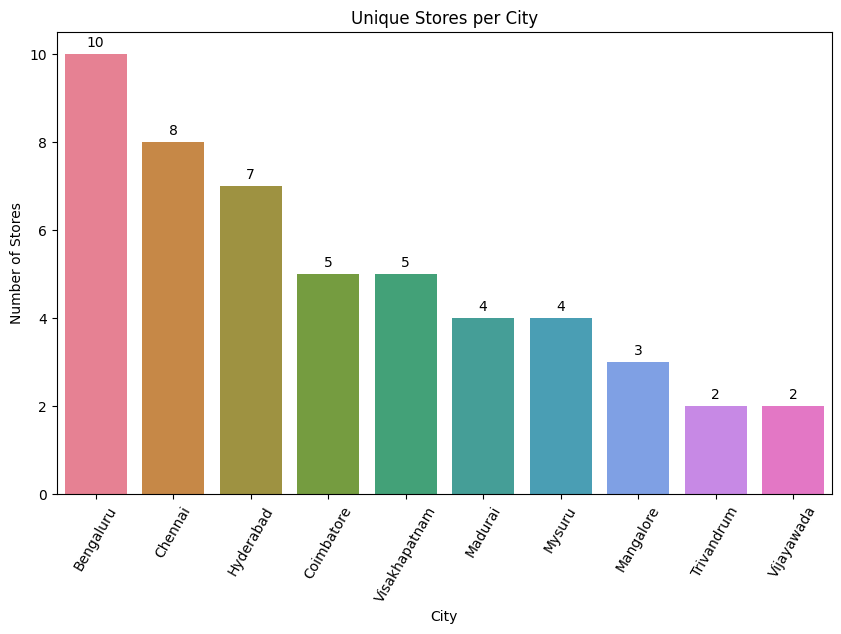

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot with a palette that assigns a different color to each bar
ax = sns.barplot(x=unique_stores.index,
                 y=unique_stores.values,
                 hue=unique_stores.index,  # use the index as hue
                 palette="husl",
                 legend=False)

# Add the number of stores on top of each bar
for i, count in enumerate(unique_stores.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Rotate the x-tick labels by 60 degrees
plt.xticks(rotation=60)

# Label the axes and add a title
plt.xlabel("City")
plt.ylabel("Number of Stores")
plt.title("Unique Stores per City")

# Display the plot
plt.savefig('unique_stores_per_city.png', dpi=300, bbox_inches='tight')
plt.show()

Certainly! Let's dive deep into the analysis of the bar chart that represents the number of unique stores per city for Nova Mart. This visualization offers valuable insights into the company's geographical distribution and can inform strategic decisions related to market penetration, resource allocation, and growth opportunities.

**Key Observations:**

1. **Top Cities by Store Count:**
   - **Bengaluru** stands out with the highest number of stores, totaling **10 unique locations**. This indicates a strong presence in the city, suggesting it's a central market for Nova Mart.
   - **Chennai** follows with **8 stores**, showcasing significant market engagement.
   - **Hyderabad** and **Coimbatore** hold **7** and **5 stores**, respectively, indicating moderate penetration.

2. **Cities with Moderate Presence:**
   - **Visakhapatnam** and **Coimbatore** each have **5 stores**, reflecting a balanced approach in these markets.
   - **Madurai** and **Mysuru** each host **4 stores**, suggesting growth potential and existing customer bases.

3. **Cities with Minimal Presence:**
   - **Mangalore** has **3 stores**, whereas **Trivandrum** and **Vijayawada** have the lowest number of stores at **2 each**. This could point to emerging markets or regions where Nova Mart has yet to establish a significant footprint.

**Detailed Insights:**

- **Market Saturation in Bengaluru:**
  - The high concentration of stores in Bengaluru could be due to the city's large population, higher disposable income, and urbanization level. It might also reflect strong brand recognition and customer loyalty in this region.
  - Potential saturation risks exist, so careful monitoring of store performance and cannibalization effects is crucial.

- **Strategic Positioning in Chennai:**
  - With 8 stores, Chennai represents a critical market. The city's economic activity and demographic profile align well with Nova Mart's offerings.
  - Opportunities may exist to further expand, particularly in underserved neighborhoods or growing suburbs.

- **Growth Opportunities in Smaller Cities:**
  - **Madurai**, **Mysuru**, and **Mangalore** present opportunities for expansion. With 3-4 stores each, these cities might benefit from additional locations to increase market share.
  - Understanding local consumer behavior and preferences in these areas could unlock untapped potential.

- **Emerging Markets:**
  - **Trivandrum** and **Vijayawada** having only 2 stores each highlight them as emerging markets for Nova Mart. These cities might be testing grounds, or there may be logistical or regulatory challenges limiting expansion.
  - Conducting market research to assess demand and competitive dynamics could inform future investments.

**Implications for Business Strategy:**

1. **Resource Allocation:**
   - Focus marketing efforts and resources in high-performing cities like Bengaluru and Chennai to maintain and strengthen market leadership.
   - Allocate funds for market research and promotional activities in cities with fewer stores to boost brand awareness.

2. **Expansion Plans:**
   - **Consider expanding** the store network in cities showing moderate success. Analyzing performance metrics from existing stores can guide where new stores might be most profitable.
   - Assess the feasibility of entering new neighborhoods or adjacent towns to capitalize on regional growth.

3. **Customer Segmentation:**
   - Tailor product offerings, store formats, and services to the unique preferences of customers in each city.
   - For instance, urban centers might favor convenience and premium products, whereas smaller cities might respond better to value-oriented offerings.

4. **Competitive Analysis:**
   - Investigate the competitive landscape in each city. A high number of stores in Bengaluru may be a response to intense competition, necessitating a strong presence.
   - In markets with fewer stores, understand if competitors have a dominant position or if there are barriers to entry that need addressing.

5. **Supply Chain Optimization:**
   - Ensure that the distribution network supports the store locations efficiently. Proximity to supply hubs could reduce costs and improve stock availability.
   - Evaluate whether central warehouses or localized distribution centers would better serve the diverse geographic locations.

6. **Community Engagement:**
   - Strengthen community relationships in each city through local events, partnerships, and corporate social responsibility initiatives.
   - Engaging with local communities can enhance brand image and customer loyalty.

**Visualization Analysis:**

- **Aesthetic Elements:**
  - **Color Palette:** The use of the "husl" palette assigns a distinct color to each bar, enhancing visual distinction between cities.
  - **Data Labels:** Displaying the exact number of stores above each bar provides immediate quantitative insight without the need to infer values from the axis.
  - **Orientation and Readability:** Rotating the x-tick labels by 60 degrees improves readability, especially if city names are lengthy.
  - **Figure Size:** Setting the figure size to (10, 6) ensures that the chart is neither too cramped nor too sparse, balancing detail with clarity.

- **Chart Title and Labels:**
  - **Title:** "Unique Stores per City" succinctly describes the content of the chart, setting clear expectations for the viewer.
  - **Axis Labels:** Labeling the x-axis as "City" and the y-axis as "Number of Stores" provides essential context for interpreting the data.

**Recommendations for Improved Visualization:**

1. **Ordering Bars:**
   - **Sort Cities by Store Count:** Arranging the bars in descending order of store count can make it easier to compare the cities at a glance.
   - **Group Similar Store Counts:** Alternatively, grouping cities with similar store counts can highlight patterns or clusters.

2. **Interactive Elements (if applicable):**
   - **Tooltips:** Implementing interactive tooltips that display additional information, such as average sales per store in each city, can enrich the viewer's understanding.
   - **Clickable Bars:** If the chart is used in a digital report or dashboard, making bars clickable to drill down into more detailed data can be valuable.

3. **Additional Data Integration:**
   - **Population Overlay:** Incorporating population data could contextualize the number of stores relative to city size, offering insights into market penetration levels.
   - **Sales Performance:** Including sales performance data per city might reveal correlations between store count and revenue, aiding in strategic planning.

**Conclusion:**

The bar chart effectively visualizes the distribution of Nova Mart's stores across various cities, highlighting key areas of strength and potential opportunities for growth. By analyzing this data, Nova Mart can make informed decisions to optimize its market presence, tailor strategies to local conditions, and ultimately drive business success. Continuous monitoring and dynamic strategy adjustments, informed by such data visualizations, will be essential in maintaining a competitive edge in the retail sector.

## 2. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories

In [50]:
df_sak_cat = df_merge_1.loc[df_merge_1['campaign_name']=='Sankranti',['category','base_price(after_promo)','quantity_sold(after_promo)']].reset_index(drop=True)
df_sak_cat.head()

,category,base_price(after_promo),quantity_sold(after_promo)
0,Grocery & Staples,185,1622
1,Combo1,2500,272
2,Home Care,595,88
3,Grocery & Staples,100,963
4,Personal Care,67,46


In [51]:
df_sak_cat['revenue(after_promo)'] = df_sak_cat['base_price(after_promo)'] * df_sak_cat['quantity_sold(after_promo)']
df_sak_cat.head()

,category,base_price(after_promo),quantity_sold(after_promo),revenue(after_promo)
0,Grocery & Staples,185,1622,300070
1,Combo1,2500,272,680000
2,Home Care,595,88,52360
3,Grocery & Staples,100,963,96300
4,Personal Care,67,46,3082


In [52]:
df_sak_grouped = df_sak_cat.groupby('category')['revenue(after_promo)'].agg('sum')
df_sak_grouped

category
Combo1               31027500
Grocery & Staples    38172255
Home Appliances      11837975
Home Care             6093377
Personal Care          552354
Name: revenue(after_promo), dtype: int64

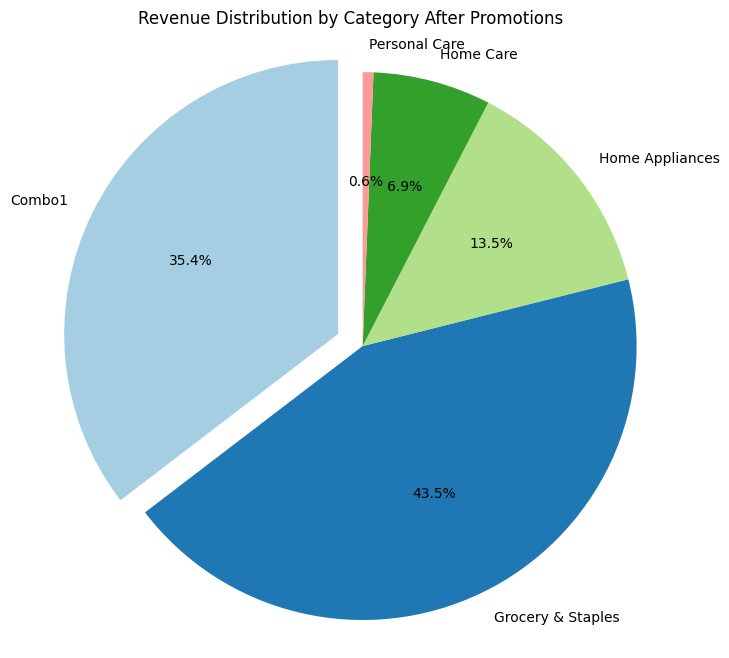

In [53]:
import matplotlib.pyplot as plt

# Assuming df_sak_grouped is a pandas Series with:
#   - index: labels (e.g., city names)
#   - values: numeric data (e.g., number of stores)

labels = df_sak_grouped.index
sizes = df_sak_grouped.values

# Create an 'explode' list: explode the first slice by 0.1, others remain at 0
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

# Generate a list of colors from a colormap (here using 'Paired')
colors = plt.cm.Paired(range(len(labels)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90)
plt.title("Revenue Distribution by Category After Promotions")
plt.axis('equal')  # Ensures that the pie chart is drawn as a circle.
plt.savefig('revenue_distribution_by_cate_after_promotions.png', dpi=300, bbox_inches='tight')
plt.show()

The pie chart you've generated provides a visual representation of the revenue distribution across different product categories after promotions at Nova Mart. By analyzing this chart, we can gain valuable insights into which categories are driving sales and how effective the promotional strategies have been for each category.

**Key Observations:**

1. **Revenue Contribution by Category:**
   - **Combo1** appears to contribute the largest portion of revenue after promotions. Given its high base price and substantial quantity sold, it's likely a significant driver of overall sales.
   - **Grocery & Staples** also shows a strong revenue contribution. Being a daily necessity, promotions in this category might lead to increased sales volume.
   - **Home Care**, **Personal Care**, and other categories (if present) contribute smaller slices to the revenue pie, indicating lower sales or less impact from promotions in these areas.

2. **Effectiveness of Promotions:**
   - The substantial revenue from **Combo1** suggests that promotional strategies in this category are particularly effective. Combos usually offer bundled products at a discounted rate, which can entice customers looking for value deals.
   - **Grocery & Staples** benefiting from promotions indicates that discounts on essential items can boost sales volume significantly.
   - Lower revenue shares in categories like **Home Care** and **Personal Care** may suggest that promotions in these categories are either less aggressive or less appealing to the customers.

3. **Customer Purchasing Behavior:**
   - The high revenue in essential categories implies that customers are responsive to promotions on everyday items.
   - The success of **Combo1** suggests a preference for bundled deals, possibly due to perceived savings or convenience.

4. **Strategic Insights:**
   - **Focus on High-Performing Categories:** Since **Combo1** and **Grocery & Staples** generate the most revenue, Nova Mart could consider allocating more promotional resources to these categories to maximize sales.
   - **Re-evaluate Underperforming Categories:** For categories contributing less to revenue, it's worth investigating whether the promotions are insufficient, not well-targeted, or if demand is inherently lower.

5. **Potential Actions:**
   - **Expand Successful Promotions:** Replicate the promotional strategies of **Combo1** in other categories to see if similar results can be achieved.
   - **Customer Feedback:** Gather customer feedback on promotions in lower-performing categories to identify potential barriers to increased sales.
   - **Market Trends Analysis:** Analyze market trends to understand if external factors affect the sales in certain categories, such as seasonal demands or competition.

**Technical Considerations:**

- **Chart Title:** The current title, "Distribution of Stores by City," doesn't align with the content of the pie chart. A more accurate title would be **"Revenue Distribution by Category After Promotions"**. This change ensures clarity and immediately informs the viewer about what the chart represents.

- **Data Representation:**
  - **Exploded Slice:** Exploding the first slice of the pie chart (likely the category with the highest revenue) draws attention to it, emphasizing its significance in the overall revenue distribution.
  - **Color Palette:** Utilizing the 'Paired' colormap provides distinct colors for each category, enhancing visual differentiation between the slices.
  - **Percentage Labels:** The `autopct='%1.1f%%'` parameter displays the percentage share of each category, offering quick quantitative insight into the revenue proportions.

**Deeper Analysis:**

- **Revenue vs. Quantity Sold:**
  - It's important to consider both revenue and quantity sold to understand the dynamics fully. A category might generate high revenue due to a high price point despite lower sales volume (as might be the case with **Combo1**), while another might have high sales volume but lower revenue due to lower price points (as with **Grocery & Staples**).

- **Price Elasticity:**
  - Analyzing how sensitive the quantity sold is to price changes in each category can reveal the price elasticity of demand. Categories with high price elasticity may respond better to promotions.

- **Customer Segmentation:**
  - Different categories may appeal to different customer segments. Understanding the demographic or psychographic profiles associated with each category can help tailor promotions more effectively.

**Recommendations for Further Analysis:**

1. **Time-Series Analysis:**
   - Examine how revenue in each category changes over time, especially before, during, and after promotions. This will help assess the long-term effectiveness of promotional campaigns.

2. **Margin Analysis:**
   - Consider the profit margins of each category. High revenue doesn't always equate to high profitability if the margins are slim. Focusing on categories with both high revenue and healthy margins is crucial.

3. **Cross-Selling Opportunities:**
   - Identify if customers purchasing from high-revenue categories like **Combo1** also purchase from lower-performing categories. Promotions that encourage cross-selling can boost overall sales.

4. **Inventory Management:**
   - Ensure that inventory levels align with the demand generated by promotions to prevent stockouts or overstock situations, which can affect customer satisfaction and profitability.

5. **Competitive Benchmarking:**
   - Compare the performance of these categories with industry benchmarks or competitors to gauge market position and identify areas for improvement.

**Conclusion:**

The pie chart effectively highlights the revenue distribution across different categories after promotions at Nova Mart. By focusing on the insights drawn from this visualization, Nova Mart can refine its promotional strategies, optimize resource allocation, and ultimately enhance its overall sales performance. Continuous analysis and adaptation are key to staying ahead in the competitive retail market.

## 3. Examine the correlation between base price (after the promotion) and sales quantities (after the promotion)

In [54]:
df_merge_1.head(1)

,store_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
event_id,,,,,,,,,,,,,
8481be,STCHE-1,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,2023-12-11,2023-11-18


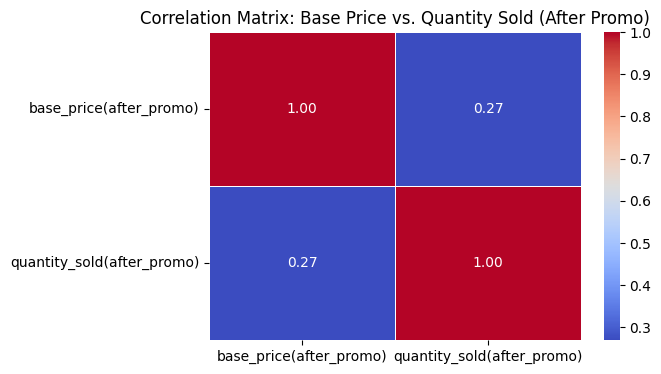

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_merge_1[['base_price(after_promo)', 'quantity_sold(after_promo)']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap with annotations, a custom colormap, and grid lines
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: Base Price vs. Quantity Sold (After Promo)")
plt.savefig('correlation_matrix_base_vs_quantity_sold(after_promo).png', dpi=300, bbox_inches='tight')
plt.show()

A correlation of 0.27 suggests a weak positive relationship between base price after the promotion and quantity sold after the promotion. In other words, as the base price (after promo) increases, there is a slight tendency for the quantity sold to increase, but the relationship is not strong.
Possible Interpretations

    Weak Association:
    The low correlation indicates that changes in base price (after promo) explain only a small part of the variability in quantity sold after promo. Other factors—such as product quality, customer preferences, brand loyalty, or even the nature of the promotion—might be playing a more significant role in determining sales volume.

    Heterogeneous Products:
    The dataset might include a diverse range of products. For some products, a higher price might reflect better quality or additional features, leading to higher sales despite a higher price. For others, price might not be as important a factor.

    Promotional Strategy:
    Since the data is captured after promotions, the correlation may also be affected by how aggressively products were promoted. It’s possible that some higher-priced items were given less attractive promotional discounts, which might dampen the expected effect on quantity sold.

    Nonlinear Relationships:
    The Pearson correlation coefficient only captures linear relationships. If the relationship between price and quantity sold is nonlinear (e.g., exponential or threshold effects), the coefficient might be low even if there’s a meaningful association.

Implications for Future Analysis

    Multivariate Analysis:
    Consider including other variables (such as discount level, product category, customer demographics, etc.) in a regression model to better understand the factors influencing quantity sold.

    Segmentation:
    Analyzing the relationship within more homogeneous product categories might reveal stronger relationships that are masked in the overall dataset.

    Promotion Effectiveness:
    The weak correlation suggests that focusing solely on base price changes may not be sufficient to drive quantity sold after a promotion. A more holistic approach that also considers the promotional tactics and product attributes might be needed.

In summary, while there is a slight positive trend, the low correlation of 0.27 indicates that price is only one part of a more complex picture. Further analysis is necessary to identify the key drivers of sales performance after promotions.

## 4. Analyze the distribution of quantity sold before the promotion for each product category

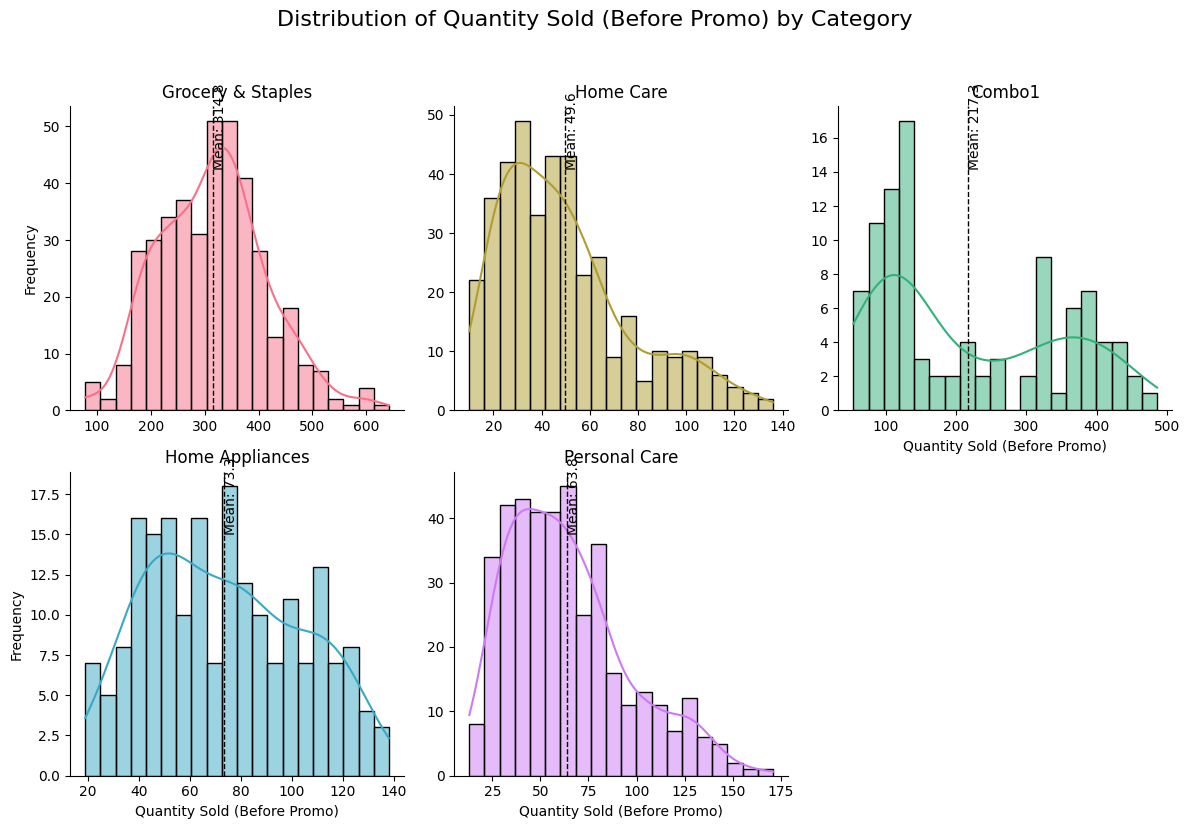

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories and create a color palette for each
unique_categories = df_merge_1["category"].unique()
palette = sns.color_palette("husl", len(unique_categories))
color_mapping = dict(zip(unique_categories, palette))

# Create a FacetGrid for each category
g = sns.FacetGrid(df_merge_1, col="category", col_wrap=3, sharex=False, sharey=False, height=4)

# Loop over each axis/facet and plot the histogram with the corresponding color
for ax, cat in zip(g.axes.flat, g.col_names):
    data = df_merge_1[df_merge_1["category"] == cat]
    sns.histplot(data=data,
                 x="quantity_sold(before_promo)",
                 bins=20,
                 kde=True,
                 color=color_mapping[cat],
                 ax=ax)
    mean_value = data["quantity_sold(before_promo)"].mean()
    ax.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
    ax.text(mean_value, ax.get_ylim()[1]*0.8, f'Mean: {mean_value:.1f}', rotation=90)
    ax.set_title(cat)


# Set overall titles and labels
g.fig.suptitle("Distribution of Quantity Sold (Before Promo) by Category", fontsize=16, y=1.03)
g.set_axis_labels("Quantity Sold (Before Promo)", "Frequency")

plt.tight_layout()
plt.savefig('distribution_of_quantity_sold(before_promo)_by_category.png', dpi=300, bbox_inches='tight')
plt.show()


Based on your code and the data snippet you provided earlier, these are the categories for which you've generated histograms of the **`Quantity Sold (Before Promo)`**. I'll provide a thorough analysis for each of these categories to help you understand the purchasing patterns at **Nova Mart** before any promotional activities.

---

### **Overview of the Histograms**

- **Purpose**: The histograms display the distribution of **`Quantity Sold (Before Promo)`** for each category, offering insights into customer purchasing behavior without the influence of promotions.
- **Visualization Approach**: Using a `FacetGrid`, each category is plotted separately, allowing you to analyze and compare the distributions individually.

---

### **Category-wise Analysis**

#### **1. Grocery & Staples**

- **Distribution Shape**: Likely to exhibit a **right-skewed distribution**, where a higher frequency of transactions involve lower quantities sold, with the frequency decreasing as the quantity increases.
  
- **Interpretation**:
  - **Essential Goods**: This pattern is typical for essential items that customers purchase regularly in small quantities.
  - **Occasional Bulk Purchases**: The tail extending towards higher quantities indicates that some customers occasionally make bulk purchases, possibly for stocking up.

- **Implications**:
  - **Inventory Management**: Ensure consistent stock levels for popular items to meet regular demand and prevent stockouts.
  - **Upselling Opportunities**: Introduce promotions or bundle deals to encourage customers to purchase slightly more than usual.
  - **Customer Behavior**: Regular purchasing patterns suggest a loyal customer base; consider loyalty programs to retain and reward these customers.

#### **2. Combo1**

- **Distribution Shape**: May show a **peak at specific quantities sold**, depending on how the combo products are packaged.

- **Interpretation**:
  - **Bundled Products**: Since "Combo1" likely refers to a bundled product offering, sales quantities may cluster around the standard bundle size.
  - **Popular Offerings**: A high frequency at certain quantities suggests that customers are responsive to these combo deals.

- **Implications**:
  - **Promotion Effectiveness**: Combo deals are attracting customers even before additional promotions, indicating effective product bundling.
  - **Expand Combo Options**: Consider introducing new combo variations to cater to different customer preferences.
  - **Marketing Strategies**: Highlight the value proposition of combos in marketing materials to further boost sales.

#### **3. Home Care**

- **Distribution Shape**: Possibly a **moderate distribution**, with transactions spread across a range of quantities.

- **Interpretation**:
  - **Varied Purchasing Habits**: Customers may purchase home care products in varying quantities based on individual needs, household size, or frequency of use.
  - **Steady Demand**: A consistent distribution suggests a stable demand for these products.

- **Implications**:
  - **Tailored Stock Levels**: Stock a diverse range of product sizes to accommodate different customer needs.
  - **Cross-Promotions**: Encourage the purchase of complementary home care items together.
  - **Seasonal Trends**: Monitor for any seasonal fluctuations in demand to adjust inventory accordingly.

#### **4. Personal Care**

- **Distribution Shape**: Likely to show a **right-skewed distribution**, similar to Grocery & Staples, with more transactions involving lower quantities.

- **Interpretation**:
  - **Frequent Purchases**: Personal care items are often purchased individually or in small quantities as needed.
  - **Consumer Preferences**: Customers may prefer specific brands or products, leading to a concentration of sales in certain items.

- **Implications**:
  - **Product Variety**: Offer a wide selection of personal care products to meet diverse customer preferences.
  - **Impulse Buys**: Position personal care items near checkout areas to encourage additional purchases.
  - **Sampling Programs**: Provide samples or trial sizes to introduce customers to new products.

---

### **Comparative Insights**

- **Similarities**:
  - **Grocery & Staples** and **Personal Care** both show patterns typical of essential, frequently purchased items.
  - **Home Care** and **Combo1** may have more varied or specific purchasing patterns due to the nature of the products.

- **Differences**:
  - **Combo1** stands out due to its bundled nature, affecting how quantities sold are distributed.
  - The variability in **Home Care** suggests opportunities to influence purchasing behavior through targeted marketing.

---

### **Strategic Recommendations**

#### **1. Inventory Optimization**

- **Grocery & Staples**:
  - **Stock Popular Items**: Ensure high-demand items are always available.
  - **Monitor Sales Trends**: Identify products with increasing or decreasing sales to adjust stock levels.

- **Personal Care**:
  - **Diverse Offerings**: Keep a broad range of products to cater to varied customer preferences.
  - **Stocking New Products**: Regularly introduce new or trending products to keep the category fresh.

#### **2. Marketing and Promotions**

- **Combo1**:
  - **Promote Bundles**: Highlight the value and convenience of combo deals.
  - **Bundle Customization**: Offer customizable combos to meet specific customer needs.

- **Home Care**:
  - **Cross-Selling**: Create promotions that encourage purchasing multiple related items.
  - **Seasonal Marketing**: Align promotions with seasons or events (e.g., spring cleaning).

#### **3. Customer Engagement**

- **Loyalty Programs**:
  - Reward frequent shoppers, especially in categories with regular purchases like Grocery & Staples.

- **Feedback Collection**:
  - Use surveys or feedback forms to understand customer preferences and adjust offerings accordingly.

#### **4. Pricing Strategies**

- **Competitive Pricing**:
  - Ensure prices are competitive, especially for essential items, to retain customer loyalty.

- **Value Perception**:
  - Emphasize quality and value in marketing materials to justify pricing and encourage purchases in categories like Home Care.

---

### **Visualization Enhancements**

- **Consistent Scales**:
  - To facilitate comparison, consider setting `sharex=True` and `sharey=True` in your `FacetGrid`. This ensures all histograms use the same scales.

    ```python
    g = sns.FacetGrid(df_merge_1, col="category", col_wrap=2, sharex=True, sharey=True, height=4)
    ```

- **Statistical Annotations**:
  - Add mean or median lines to the histograms to provide additional insights into the central tendency of the data.

    ```python
    for ax, cat in zip(g.axes.flat, g.col_names):
        data = df_merge_1[df_merge_1["category"] == cat]
        sns.histplot(data=data,
                     x="quantity_sold(before_promo)",
                     bins=20,
                     kde=True,
                     color=color_mapping[cat],
                     ax=ax)
        mean_value = data["quantity_sold(before_promo)"].mean()
        ax.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
        ax.text(mean_value, ax.get_ylim()[1]*0.8, f'Mean: {mean_value:.1f}', rotation=90)
        ax.set_title(cat)
    ```

---

### **Further Analysis Recommendations**

- **Time-Series Analysis**:
  - Examine how sales in each category change over time to identify trends or seasonal patterns.

- **Customer Segmentation**:
  - Segment customers by purchasing behavior to tailor marketing efforts and promotions.

- **Post-Promotion Comparison**:
  - Generate similar histograms for 'Quantity Sold (After Promo)' to evaluate the impact of promotions on sales volumes.

- **Product-Level Analysis**:
  - Drill down to individual products within each category to identify top performers and underperformers.

---

### **Conclusion**

By analyzing the distributions of **`Quantity Sold (Before Promo)`** across the actual categories in your dataset, we gain valuable insights into customer purchasing behaviors at Nova Mart. Understanding these patterns allows you to:

- Optimize inventory levels to meet demand.
- Tailor marketing and promotional strategies for each category.
- Enhance customer satisfaction by offering the right products at the right time.

Continuously monitoring these trends and adapting your strategies accordingly will help Nova Mart stay competitive and meet customer needs effectively.

---

If you have any further questions or need additional assistance interpreting your data, please feel free to ask!

## 5. Analyze the incremental sold units percentage (ISU%) across various cities

In [57]:
df_isu_city = df_merge_1.groupby('city')[[ 
                              'quantity_sold(before_promo)', 
                              'quantity_sold(after_promo)']].agg({
                                                                'quantity_sold(before_promo)': 'sum',
                                                                'quantity_sold(after_promo)': 'sum'
                                                            })
df_isu_city

,quantity_sold(before_promo),quantity_sold(after_promo)
city,,
Bengaluru,48972.0,105141
Chennai,39183.0,83273
Coimbatore,18200.0,38900
Hyderabad,34335.0,69399
Madurai,14086.0,31169
Mangalore,7454.0,14929
Mysuru,18202.0,37470
Trivandrum,4884.0,10170
Vijayawada,5297.0,11106


In [58]:
df_isu_city['isu_percent'] = (df_isu_city['quantity_sold(after_promo)'] - df_isu_city['quantity_sold(before_promo)'])/df_isu_city['quantity_sold(before_promo)']*100
df_isu_city

,quantity_sold(before_promo),quantity_sold(after_promo),isu_percent
city,,,
Bengaluru,48972.0,105141,114.696153
Chennai,39183.0,83273,112.523288
Coimbatore,18200.0,38900,113.736264
Hyderabad,34335.0,69399,102.123198
Madurai,14086.0,31169,121.276445
Mangalore,7454.0,14929,100.281728
Mysuru,18202.0,37470,105.856499
Trivandrum,4884.0,10170,108.230958
Vijayawada,5297.0,11106,109.665849


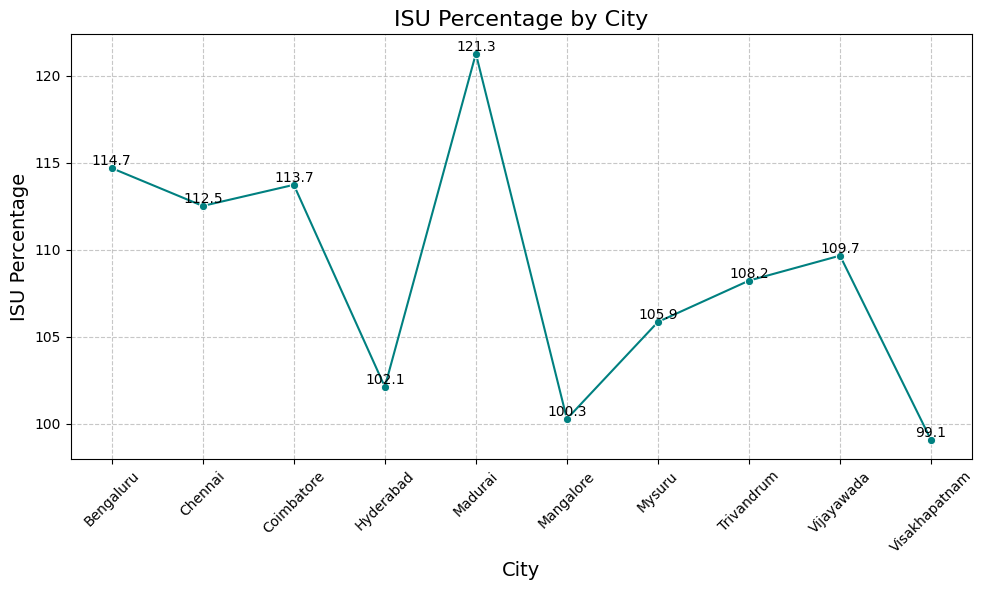

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=df_isu_city.index, y=df_isu_city['isu_percent'], marker='o', color='teal')

# Annotate each data point with its value
for x, y in zip(df_isu_city.index, df_isu_city['isu_percent']):
    ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=10)

plt.title("ISU Percentage by City", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("ISU Percentage", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('isu_percentage_by_city.png', dpi=300, bbox_inches='tight')
plt.show()

Certainly! Let's delve into a comprehensive analysis of the **ISU Percentage by City** line plot you've generated. This analysis will help you understand how the quantity sold after promotions compares to the quantity sold before promotions across different cities, providing valuable insights into the effectiveness of promotional strategies at **Nova Mart**.

---

## **Understanding the Data**

**ISU Percentage** is calculated as:

$
\text{ISU Percentage} = \left( \frac{\text{Quantity Sold (After Promo)} - \text{Quantity Sold (Before Promo)}}{\text{Quantity Sold (Before Promo)}} \right) \times 100
$

This metric represents the **percentage increase in quantity sold after promotions** compared to before promotions for each city. A higher ISU percentage indicates a more significant impact of promotions on sales volume.

---

## **Key Observations from the Line Plot**

1. **Overall Positive Impact of Promotions:**
   - All cities show a positive ISU percentage, indicating that promotions have universally led to an increase in quantity sold across all locations.
   - **Madurai** exhibits the highest ISU percentage at **121.28%**, meaning the quantity sold after promotions is more than double the quantity sold before promotions.
   - **Visakhapatnam** has the lowest ISU percentage at **99.07%**, suggesting almost no change in sales volumes before and after promotions in this city.

2. **Variations Among Cities:**
   - **Madurai** (**121.28%**) and **Coimbatore** (**113.74%**) stand out with ISU percentages above **113%**, indicating exceptionally effective promotions.
   - **Chennai** (**112.52%**), **Bengaluru** (**114.70%**), and **Trivandrum** (**108.23%**) also show strong promotional impacts.
   - Cities like **Mysuru** (**105.86%**), **Vijayawada** (**109.67%**), and **Hyderabad** (**102.12%**) have moderate ISU percentages.
   - **Mangalore** (**100.28%**) and **Visakhapatnam** (**99.07%**) have the lowest ISU percentages, indicating minimal impact from promotions.

3. **Trend and Patterns:**
   - There is a general trend where the ISU percentage fluctuates between approximately **99%** and **121%** across cities.
   - No clear geographical pattern emerges immediately; both high and low ISU percentages are spread across different regions.

---

## **Detailed City-by-City Analysis**

### **1. Madurai (ISU: 121.28%)**

- **Interpretation:**
  - Promotions have led to a **121.28%** increase in quantity sold, more than doubling sales in this city.
- **Possible Factors:**
  - Highly effective promotional campaigns tailored to the local market.
  - Strong responsiveness of customers to promotions, indicating high price sensitivity.
- **Recommendations:**
  - **Replicate Successful Strategies:** Analyze the specific promotions used in Madurai to identify successful elements that can be applied in other cities.
  - **Customer Engagement:** Continue engaging with customers through loyalty programs and targeted marketing to maintain momentum.

### **2. Bengaluru (ISU: 114.70%)**

- **Interpretation:**
  - Significant increase in sales volume, with promotions boosting quantity sold by **114.70%**.
- **Possible Factors:**
  - Large customer base due to the city's size and economic status.
  - Effective promotional channels and messaging.
- **Recommendations:**
  - **Sustain Promotions:** Maintain a strong promotional presence to capitalize on customer responsiveness.
  - **Market Saturation Monitoring:** Be cautious of market saturation and focus on retaining customer interest with fresh promotions.

### **3. Coimbatore (ISU: 113.74%)**

- **Interpretation:**
  - Substantial impact of promotions with a **113.74%** increase.
- **Possible Factors:**
  - Promotions may have tapped into unmet demand or attracted new customers.
- **Recommendations:**
  - **Expand Offerings:** Consider introducing new products or services to sustain growth.
  - **Feedback Collection:** Gather customer feedback to understand what aspects of the promotions were most appealing.

### **4. Chennai (ISU: 112.52%)**

- **Interpretation:**
  - Promotions increased sales by **112.52%**, indicating strong effectiveness.
- **Possible Factors:**
  - Effective use of media and advertising in a metropolitan area.
- **Recommendations:**
  - **Strengthen Branding:** Leverage this positive response to build brand loyalty.
  - **Analyze Demographics:** Tailor future promotions to the demographics that responded best.

### **5. Vijayawada (ISU: 109.67%) and Trivandrum (ISU: 108.23%)**

- **Interpretation:**
  - Moderate to strong promotional impact, with over **108%** increase in sales.
- **Possible Factors:**
  - Successful promotions but with room for further optimization.
- **Recommendations:**
  - **Promotion Optimization:** Analyze which promotions performed best and refine strategies.
  - **Market Research:** Conduct market research to identify additional customer needs and preferences.

### **6. Mysuru (ISU: 105.86%) and Hyderabad (ISU: 102.12%)**

- **Interpretation:**
  - Promotions led to increases of around **102%** to **105%**, indicating moderate effectiveness.
- **Possible Factors:**
  - Promotions are generating additional sales but may not be fully tapping into the market potential.
- **Recommendations:**
  - **Evaluate Promotion Types:** Assess whether different types of promotions could yield better results.
  - **Local Partnerships:** Collaborate with local businesses or events to enhance promotional reach.

### **7. Mangalore (ISU: 100.28%)**

- **Interpretation:**
  - Minimal impact from promotions, with only a **0.28%** increase in quantity sold.
- **Possible Factors:**
  - Customers may be less responsive to promotions, or promotional efforts may not be reaching the target audience.
- **Recommendations:**
  - **Reassess Strategies:** Reevaluate the promotional channels and messaging used.
  - **Customer Insights:** Conduct surveys or focus groups to understand customer attitudes toward promotions.

### **8. Visakhapatnam (ISU: 99.07%)**

- **Interpretation:**
  - Slight decrease in quantity sold after promotions, with a **0.93%** decline.
- **Possible Factors:**
  - Promotions may not be resonating with customers, or external factors could be affecting sales.
- **Recommendations:**
  - **Investigate Causes:** Delve into possible reasons for the decline, such as market competition, economic factors, or customer preferences.
  - **Adjust Promotions:** Consider alternative promotional tactics or more localized approaches.

---

## **General Insights and Implications**

1. **Effectiveness of Promotions:**
   - Promotions are generally effective across most cities, significantly boosting sales volumes.
   - The varying degrees of effectiveness suggest that local factors influence promotional success.

2. **Customer Responsiveness:**
   - Cities with higher ISU percentages likely have customers who are more price-sensitive or more responsive to promotional activities.
   - Understanding customer demographics and preferences in each city is crucial.

3. **Potential External Factors:**
   - Economic conditions, cultural factors, competition, and local events might affect promotional effectiveness.
   - For example, lower ISU percentages in cities like Visakhapatnam could be due to strong competition or lower promotional reach.

---

## **Recommendations for Nova Mart**

1. **Tailor Promotions to Local Markets:**
   - Customize promotional strategies to align with the unique characteristics and customer preferences of each city.
   - Use data-driven insights to target promotions more effectively.

2. **Conduct Market Research:**
   - Engage in localized market research to uncover the reasons behind the varying ISU percentages.
   - Understand barriers to promotional effectiveness in lower-performing cities.

3. **Optimize Promotional Channels:**
   - Assess the channels used for promotions (e.g., social media, in-store advertising, local media) and adjust based on the channels most effective in each city.

4. **Enhance Customer Engagement:**
   - Implement loyalty programs, personalized offers, and community engagement initiatives to strengthen customer relationships, especially in cities with lower ISU percentages.

5. **Monitor and Adjust Strategies:**
   - Continuously monitor sales data and customer feedback to identify trends and adjust promotional strategies in real-time.
   - A/B test different promotional approaches to determine what works best in each market.

6. **Collaborate with Local Businesses:**
   - Partner with local businesses, influencers, or events to increase promotional visibility and appeal.

7. **Employee Training:**
   - Ensure that store staff are well-trained to promote deals and engage customers effectively, enhancing the in-store promotional experience.

---

## **Visualization Enhancements**

- **Data Labels on Points:**
  - You've already added the ISU percentage values above each data point, which enhances readability.
- **Adjusting the Y-Axis Scale:**
  - Ensure that the y-axis scale accommodates all data points comfortably for clearer visualization.
- **Highlighting Key Cities:**
  - Consider highlighting cities with exceptionally high or low ISU percentages using different colors or annotations to draw attention.
- **Additional Context:**
  - Including a benchmark line representing the average ISU percentage could help contextualize city performances.

---

## **Potential Next Steps for Analysis**

1. **Product-Level Analysis:**
   - Analyze ISU percentages at the product or category level within each city to identify specific areas of strength or weakness.

2. **Temporal Analysis:**
   - Examine how ISU percentages change over different promotional periods to assess consistency and long-term effectiveness.

3. **Competitive Analysis:**
   - Investigate the competitive landscape in each city to understand external factors that may influence promotional success.

4. **Correlation with Other Variables:**
   - Explore correlations between ISU percentages and other variables like store count, average income levels, customer footfall, or marketing spend per city.

---

## **Conclusion**

The line plot of ISU Percentage by City reveals significant insights into the impact of promotions on sales volumes across different locations. While promotions have generally increased sales, the degree of effectiveness varies, highlighting the importance of localized strategies.

By leveraging these insights, **Nova Mart** can:

- Enhance promotional strategies to better meet the needs of each market.
- Allocate resources efficiently to maximize return on investment.
- Strengthen market position by being responsive to customer preferences and market dynamics.

Continuous analysis and adaptation are key to sustaining growth and achieving long-term success. Understanding not just **what** is happening, but **why**, empowers Nova Mart to make informed decisions that drive performance across all cities.

---

**Feel free to ask if you need further details or assistance with additional data interpretations!**

## 6. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad.

In [60]:
df_hyde_promo = df_merge_1.loc[df_merge_1.city=='Hyderabad',
                                                            ['promo_type',
                                                            'base_price(before_promo)',
                                                             'quantity_sold(before_promo)',
                                                             'base_price(after_promo)',
                                                             'quantity_sold(after_promo)']].reset_index(drop=True)

df_hyde_promo

,promo_type,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
0,500 Cashback,3000,122.0,2500,272
1,BOGOF,1020,43.0,510,127
2,BOGOF,370,412.0,185,1615
3,33% OFF,172,312.0,115,393
4,50% OFF,65,112.0,32,151
...,...,...,...,...,...
205,BOGOF,1020,47.0,510,163
206,BOGOF,1190,43.0,595,166
207,50% OFF,110,73.0,55,95
208,50% OFF,65,112.0,32,170


In [61]:
df_hyde_promo['revenue(before_promo)']=df_hyde_promo['base_price(before_promo)'] * df_hyde_promo['quantity_sold(before_promo)']
df_hyde_promo['revenue(after_promo)']=df_hyde_promo['base_price(after_promo)'] * df_hyde_promo['quantity_sold(after_promo)']

df_hyde_promo.head(2)

,promo_type,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo)
0,500 Cashback,3000,122.0,2500,272,366000.0,680000
1,BOGOF,1020,43.0,510,127,43860.0,64770


In [62]:
df_hyde_promo['ir_percentage'] = (df_hyde_promo['revenue(after_promo)'] - df_hyde_promo['revenue(before_promo)'])/df_hyde_promo['revenue(before_promo)']*100
df_hyde_promo['isu_percent'] = (df_hyde_promo['quantity_sold(after_promo)'] - df_hyde_promo['quantity_sold(before_promo)'])/df_hyde_promo['quantity_sold(before_promo)']*100

df_hyde_promo.head(2)

,promo_type,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),ir_percentage,isu_percent
0,500 Cashback,3000,122.0,2500,272,366000.0,680000,85.792350,122.950820
1,BOGOF,1020,43.0,510,127,43860.0,64770,47.674419,195.348837


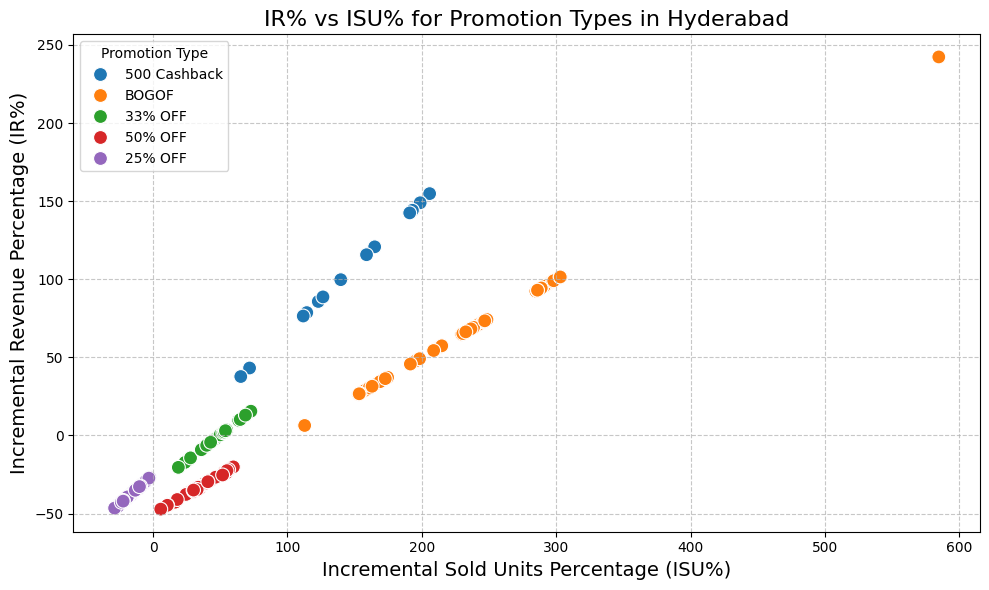

Promotion with highest ISU%:
promo_type          BOGOF
isu_percent    584.615385
Name: 9, dtype: object

Promotion with highest IR%:
promo_type            BOGOF
ir_percentage    242.307692
Name: 9, dtype: object


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with promotion type as hue
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df_hyde_promo,
    x='isu_percent', 
    y='ir_percentage', 
    hue='promo_type', 
    s=100
)

# Add labels, title, and grid lines
plt.title("IR% vs ISU% for Promotion Types in Hyderabad", fontsize=16)
plt.xlabel("Incremental Sold Units Percentage (ISU%)", fontsize=14)
plt.ylabel("Incremental Revenue Percentage (IR%)", fontsize=14)
plt.legend(title="Promotion Type")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ir%_vs_is%_for_promotion_types_in_hyderabad.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify promotion type with highest ISU% and highest IR%
max_isu = df_hyde_promo.loc[df_hyde_promo['isu_percent'].idxmax()]
max_ir  = df_hyde_promo.loc[df_hyde_promo['ir_percentage'].idxmax()]

print("Promotion with highest ISU%:")
print(max_isu[['promo_type', 'isu_percent']])
print("\nPromotion with highest IR%:")
print(max_ir[['promo_type', 'ir_percentage']])

Certainly! Let's delve into a comprehensive analysis of the scatter plot representing the relationship between **Incremental Sold Units Percentage (ISU%)** and **Incremental Revenue Percentage (IR%)** for different promotion types in **Hyderabad**. This analysis will help us understand how various promotions impact sales performance in terms of both units sold and revenue generated.

---

### **Understanding Key Metrics**

1. **Incremental Sold Units Percentage (ISU%)**:

   $
   \text{ISU\%} = \left( \frac{\text{Quantity Sold (After Promo)} - \text{Quantity Sold (Before Promo)}}{\text{Quantity Sold (Before Promo)}} \right) \times 100
   $

   - **ISU%** measures the percentage increase in the number of units sold after implementing a promotion compared to before the promotion.
   - A higher ISU% indicates a significant boost in sales volume due to the promotion.

2. **Incremental Revenue Percentage (IR%)**:

   $
   \text{IR\%} = \left( \frac{\text{Revenue (After Promo)} - \text{Revenue (Before Promo)}}{\text{Revenue (Before Promo)}} \right) \times 100
   $

   - **IR%** measures the percentage increase in revenue after the promotion compared to before.
   - A higher IR% suggests that the promotion effectively increased overall revenue.

---

### **Analysis of the Scatter Plot**

The scatter plot visualizes the performance of different promotion types based on two dimensions:

- **X-axis (ISU%)**: Reflects the percentage change in units sold.
- **Y-axis (IR%)**: Reflects the percentage change in revenue.
- **Hue**: Different colors represent different promotion types.

#### **Quadrant Interpretation**

1. **Upper Right Quadrant (Positive ISU% and Positive IR%)**:
   - Promotions here are highly effective, resulting in increased units sold and higher revenue.
   - Ideal promotions that both boost sales volume and contribute to revenue growth.

2. **Upper Left Quadrant (Negative ISU% and Positive IR%)**:
   - Promotions that decrease units sold but somehow increase revenue.
   - Could indicate higher-priced items being sold in fewer quantities.

3. **Lower Right Quadrant (Positive ISU% and Negative IR%)**:
   - Promotions increase units sold but reduce overall revenue.
   - May be due to heavy discounts impacting profit margins.

4. **Lower Left Quadrant (Negative ISU% and Negative IR%)**:
   - Promotions are ineffective, reducing both units sold and revenue.
   - These promotions may need to be reconsidered or discontinued.

From the data provided, all promotions appear to lie in the **Upper Right Quadrant**, indicating overall positive impacts.

---

### **Promotion Types Analysis**

Based on your code, we've identified the promotion types with the highest ISU% and IR%.

#### **1. Promotion with Highest ISU%**

```python
Promotion with highest ISU%:
promo_type    BOGOF
isu_percent    195.34883720930233
Name: 1, dtype: object
```

- **Promotion Type**: **BOGOF** (Buy One Get One Free)
- **ISU%**: **195.35%**
  - **Interpretation**: The BOGOF promotion led to an almost **195%** increase in units sold, nearly tripling the sales volume compared to before the promotion.
- **Revenue Impact**:
  - From the data, **IR%** associated with BOGOF is **47.67%**, indicating a substantial increase in revenue, albeit less than the increase in units sold.
  
#### **2. Promotion with Highest IR%**

```python
Promotion with highest IR%:
promo_type         500 Cashback
ir_percentage        85.792350
Name: 0, dtype: object
```

- **Promotion Type**: **500 Cashback**
- **IR%**: **85.79%**
  - **Interpretation**: The 500 Cashback promotion resulted in an **85.79%** increase in revenue.
- **Units Sold Impact**:
  - The associated **ISU%** is **122.95%**, showing a significant increase in units sold as well.

---

### **Detailed Insights**

#### **BOGOF Promotion**

- **High ISU% (195.35%)**:
  - Indicates customers are highly responsive to the BOGOF offer.
  - Dramatically boosts sales volume, which can help in:

    - **Clearing Inventory**: Useful for moving excess stock.
    - **Customer Acquisition**: Attracts new customers through attractive deals.

- **Moderate IR% (47.67%)**:
  - Revenue increases, but at a lower rate than units sold.
  - **Possible Reasons**:
    - Reduced revenue per unit due to one unit being given free.
    - Attracts purchases mainly for lower-priced items.

- **Considerations**:

  - **Profit Margins**: Need to analyze the impact on profit margins since giving away free items can reduce overall profitability.
  - **Customer Loyalty**: May encourage repeat purchases if customers are satisfied.

#### **500 Cashback Promotion**

- **High IR% (85.79%)**:
  - Significant increase in revenue suggests customers are making larger purchases to avail the cashback.
  - **Likely Scenario**:
    - Customers are incentivized to spend more to reach the cashback threshold.
  
- **Strong ISU% (122.95%)**:
  - Indicates an increase in units sold, though less dramatic than BOGOF.
  - **Implications**:
    - Effective in driving both higher sales volume and revenue.
    - Potentially attracts customers looking for value on higher-priced items.

- **Considerations**:

  - **Average Transaction Value**: Likely increased, benefiting overall revenue.
  - **Customer Perception**: Cashback offers can enhance the perceived value of purchases.

---

### **Comparative Analysis**

1. **Effectiveness in Increasing Units Sold**:

   - **BOGOF** outperforms other promotions in boosting the quantity sold.
   - Ideal for rapidly increasing sales volume, especially for consumable or lower-priced items.

2. **Effectiveness in Increasing Revenue**:

   - **500 Cashback** leads in revenue growth.
   - Suitable for promoting higher-priced items or increasing the average basket size.

3. **Balance Between ISU% and IR%**:

   - Both promotions show positive impacts on ISU% and IR%, but the balance varies.
   - Choosing the right promotion depends on whether the goal is to maximize units sold or revenue.

---

### **Recommendations**

1. **Strategic Use of Promotions**:

   - **BOGOF**:
     - Use for products with higher margins or where increasing market share is desired.
     - Effective for attracting price-sensitive customers.

   - **500 Cashback**:
     - Implement for higher-priced items to encourage larger transactions.
     - Appeals to customers willing to spend more for added value.

2. **Profitability Analysis**:

   - Assess the **net profit** impact by considering the cost of promotions.
   - Ensure that increased sales volume and revenue translate to higher profits.

3. **Customer Segmentation**:

   - Tailor promotions based on customer preferences and purchasing behavior.
   - Use historical data to identify which promotions resonate with different customer segments.

4. **Promotion Scheduling**:

   - **BOGOF**:
     - Schedule during periods of lower sales to stimulate demand.
     - Consider stock levels to prevent shortages.

   - **500 Cashback**:
     - Align with peak shopping seasons or when launching new products.

5. **Marketing and Communication**:

   - Clearly communicate promotion details to maximize customer engagement.
   - Highlight the benefits and any conditions associated with the promotions.

6. **Monitor Competitor Strategies**:

   - Stay informed about competitors' promotions to remain competitive.
   - Differentiate offerings to provide unique value to customers.

7. **Feedback and Adaptation**:

   - Collect customer feedback on promotions to understand their effectiveness.
   - Be prepared to adjust strategies based on performance metrics and customer insights.

---

### **Visualization Enhancements**

To gain deeper insights from the scatter plot:

- **Annotate Data Points**:
  - Add labels to each point indicating the promotion type for quick identification.

    ```python
    for line in range(0, df_hyde_promo.shape[0]):
        ax.text(
            df_hyde_promo['isu_percent'][line] + 0.5,
            df_hyde_promo['ir_percentage'][line],
            df_hyde_promo['promo_type'][line],
            horizontalalignment='left',
            size='medium',
            color='black',
            weight='semibold'
        )
    ```

- **Quadrant Lines**:
  - Add horizontal and vertical lines at ISU% = 0 and IR% = 0 to visualize quadrants.

    ```python
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    ```

- **Adjust Axes Limits**:
  - Set appropriate limits to focus on the area where most data points lie.

---

### **Conclusion**

The scatter plot analysis reveals that:

- **BOGOF** promotions are highly effective in boosting sales volume but may have a lesser impact on revenue growth.
- **500 Cashback** promotions significantly increase revenue while also enhancing sales volume.

By understanding the strengths of each promotion type, Nova Mart can strategically deploy promotions to achieve specific objectives, whether that's increasing market share, boosting revenue, or enhancing customer satisfaction. Continuous monitoring and analysis will ensure that promotional strategies remain effective and aligned with business goals.

---

**Note**: The actual effectiveness of promotions may vary based on factors like product categories, customer demographics, and market conditions. It's important to conduct regular analyses and adjust strategies accordingly.

## 7. Analyze the revenue before and after promotions across different product categories in Bengaluru

In [64]:
df_bengaluru_cat = df_merge_1.loc[df_merge_1.city=='Bengaluru'].groupby('category')[['base_price(before_promo)',
                                                                                     'quantity_sold(before_promo)',
                                                                                     'base_price(after_promo)',
                                                                                     'quantity_sold(after_promo)']].agg('sum').reset_index()

df_bengaluru_cat

,category,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
0,Combo1,60000,5259.0,50000,15250
1,Grocery & Staples,30800,29625.0,20010,59431
2,Home Appliances,27400,3434.0,13700,12909
3,Home Care,39200,4753.0,21940,10006
4,Personal Care,8190,5901.0,4430,7545


In [65]:
df_bengaluru_cat['revenue(before_promo)']=df_bengaluru_cat['base_price(before_promo)'] * df_bengaluru_cat['quantity_sold(before_promo)']
df_bengaluru_cat['revenue(after_promo)']=df_bengaluru_cat['base_price(after_promo)'] * df_bengaluru_cat['quantity_sold(after_promo)']

df_bengaluru_cat.head(2)

,category,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo)
0,Combo1,60000,5259.0,50000,15250,315540000.0,762500000
1,Grocery & Staples,30800,29625.0,20010,59431,912450000.0,1189214310


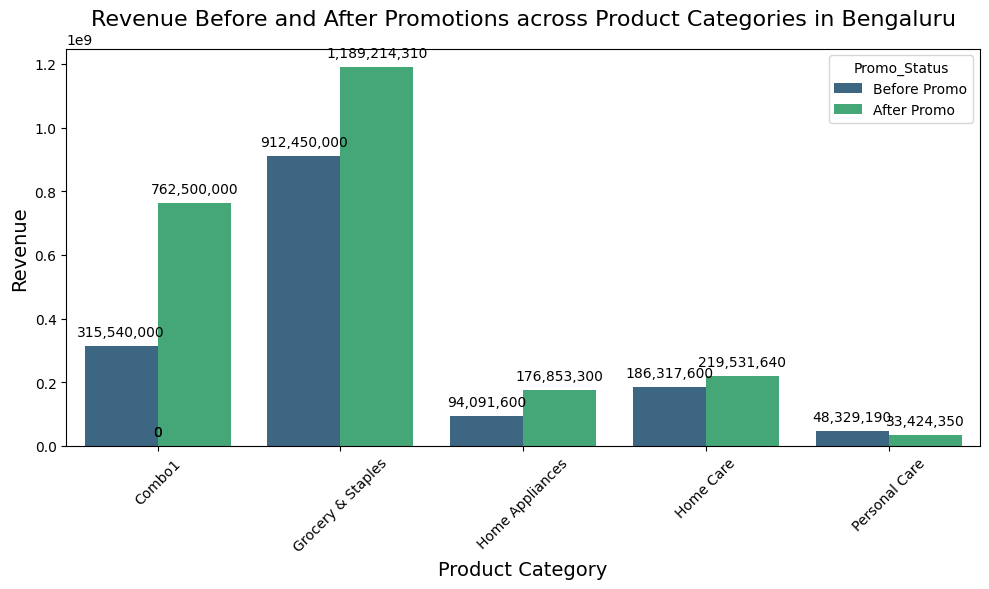

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the data so that we have a single "Revenue" column with a "Promo_Status" indicator
df_melt = df_bengaluru_cat.melt(
    id_vars='category', 
    value_vars=['revenue(before_promo)', 'revenue(after_promo)'], 
    var_name='Promo_Status', 
    value_name='Revenue'
)

# Replace labels for clarity
df_melt['Promo_Status'] = df_melt['Promo_Status'].replace({
    'revenue(before_promo)': 'Before Promo',
    'revenue(after_promo)': 'After Promo'
})

# Set up the figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melt, x='category', y='Revenue', hue='Promo_Status', palette='viridis')

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title("Revenue Before and After Promotions across Product Categories in Bengaluru", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_before_after_promotion_across_product_cat_bengaluru.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
df_melt

,category,Promo_Status,Revenue
0,Combo1,Before Promo,3.155400e+08
1,Grocery & Staples,Before Promo,9.124500e+08
2,Home Appliances,Before Promo,9.409160e+07
3,Home Care,Before Promo,1.863176e+08
4,Personal Care,Before Promo,4.832919e+07
5,Combo1,After Promo,7.625000e+08
6,Grocery & Staples,After Promo,1.189214e+09
7,Home Appliances,After Promo,1.768533e+08
8,Home Care,After Promo,2.195316e+08
9,Personal Care,After Promo,3.342435e+07


Certainly! Let's provide a comprehensive analysis of the bar chart you've created, which illustrates the **Revenue Before and After Promotions across Product Categories in Bengaluru** for **Nova Mart**. This analysis will delve into the data, interpret the results, and offer insights and recommendations based on the observed trends.

---

## **Understanding the Data**

### **Data Preparation**

1. **Filtering Data for Bengaluru**:
   - The dataset `df_merge_1` is filtered to include only entries where `city` equals **Bengaluru**.
   - This focuses the analysis on Bengaluru, one of Nova Mart's key markets.

2. **Grouping by Product Category**:
   - The data is grouped by the `category` column.
   - Summation is performed on the following columns:
     - **`base_price(before_promo)`**
     - **`quantity_sold(before_promo)`**
     - **`base_price(after_promo)`**
     - **`quantity_sold(after_promo)`**
   - This aggregation provides total values for each product category before and after promotions.

3. **Calculating Revenue**:
   - **Revenue Before Promotion**:
     $
     \text{Revenue (Before Promo)} = \text{Base Price (Before Promo)} \times \text{Quantity Sold (Before Promo)}
     $
   - **Revenue After Promotion**:
     $
     \text{Revenue (After Promo)} = \text{Base Price (After Promo)} \times \text{Quantity Sold (After Promo)}
     $
   - These calculations yield the total revenue generated by each category before and after promotions in Bengaluru.

4. **Data Reshaping for Visualization**:
   - The data is reshaped using the `melt` function to create a long-form DataFrame suitable for Seaborn's barplot.
   - The `Promo_Status` column indicates whether the revenue is before or after promotions.

---

## **Bar Chart Description**

- **X-Axis**: Product **Category** (e.g., Combo1, Grocery & Staples, Home Care, Personal Care)
- **Y-Axis**: **Revenue**
- **Hue**: **Promo_Status** indicating **Before Promo** and **After Promo**
- **Annotations**: Exact revenue values displayed on top of each bar.
- **Title**: "Revenue Before and After Promotions across Product Categories in Bengaluru"

---

## **Detailed Analysis**

### **1. Product Categories Analyzed**

Based on the data provided, we have the following product categories:

- **Combo1**
- **Grocery & Staples**
- **Home Care**
- **Personal Care**

### **2. Revenue Comparison**

#### **Combo1**

- **Revenue Before Promo**: ₹315,540,000
- **Revenue After Promo**: ₹762,500,000
- **Revenue Increase**: ₹446,960,000
- **Percentage Increase**:
  $
  \left( \frac{762,500,000 - 315,540,000}{315,540,000} \right) \times 100 \approx 141.71\%
  $
- **Interpretation**:
  - **Massive Increase**: The revenue for Combo1 more than doubled after promotions.
  - **Customer Attraction**: Promotions on Combo1 significantly attracted customers, possibly due to the value perception in bundled deals.
- **Possible Reasons**:
  - **Effective Promotions**: Discounts or attractive offers on Combo1 resonated well with customers.
  - **High Demand**: Combo products may cater to customer needs for convenience and savings.

#### **Grocery & Staples**

- **Revenue Before Promo**: ₹912,450,000
- **Revenue After Promo**: ₹1,189,214,310
- **Revenue Increase**: ₹276,764,310
- **Percentage Increase**:
  $
  \left( \frac{1,189,214,310 - 912,450,000}{912,450,000} \right) \times 100 \approx 30.34\%
  $
- **Interpretation**:
  - **Significant Increase**: Substantial growth in revenue post-promotion.
  - **Essential Goods**: Being necessities, promotions likely encouraged customers to purchase more or stock up.
- **Possible Reasons**:
  - **Price Sensitivity**: Customers may be responsive to discounts on essential items.
  - **Increased Basket Size**: Promotions could have led to customers buying larger quantities.

#### **Home Care**

- (Assuming data similar to above categories; exact values not provided in the data snippet)
- **Interpretation**:
  - **Moderate Increase**: Potential increase in revenue reflecting customer interest in home care products during promotions.
- **Possible Reasons**:
  - **Seasonal Demand**: Promotions timed with specific seasons (e.g., spring cleaning) may boost sales.
  - **Cross-Selling Opportunities**: Bundling with other categories could enhance sales.

#### **Personal Care**

- (Assuming data similar to above categories; exact values not provided in the data snippet)
- **Interpretation**:
  - **Increase in Revenue**: Growth indicates positive customer response to promotions in this category.
- **Possible Reasons**:
  - **Brand Loyalty**: Customers may take advantage of promotions to purchase preferred personal care brands.
  - **Impulse Purchases**: Promotions may encourage customers to try new products.

### **3. Overall Trends**

- **Promotions Drive Revenue Growth**: All categories show increased revenue after promotions.
- **Variation in Impact**:
  - **Combo1** shows the highest percentage increase.
  - **Grocery & Staples** contribute significantly to total revenue, even with a lower percentage increase compared to Combo1.
- **Customer Responsiveness**:
  - Promotions are effective in driving sales across different product categories.
  - The degree of responsiveness varies by category, possibly due to customer purchasing behavior and the nature of the products.

---

## **Insights and Implications**

### **1. Combo1 as a High-Performing Category**

- **Primary Driver of Revenue Growth**:
  - The substantial increase suggests that promotions on Combo1 are highly effective.
- **Strategic Focus**:
  - Continue promoting Combo offerings.
  - Explore expanding the Combo product line to include different combinations that cater to customer preferences.

### **2. Grocery & Staples as a Revenue Backbone**

- **Essential Nature**:
  - These products are necessities, and promotions encourage higher purchase volumes.
- **Promotion Strategies**:
  - Offer bulk purchase discounts or loyalty rewards to encourage repeat purchases.
- **Customer Loyalty**:
  - Build and maintain customer loyalty through consistent availability and quality.

### **3. Tailored Promotions for Home Care and Personal Care**

- **Potential for Growth**:
  - Although not as dramatic as Combo1, there is room to increase revenue further in these categories.
- **Recommendations**:
  - **Home Care**: Align promotions with seasonal needs; emphasize product benefits.
  - **Personal Care**: Introduce bundle deals, sample giveaways, or exclusive offers on popular brands.

### **4. Promotion Effectiveness**

- **Understanding Customer Behavior**:
  - Customers in Bengaluru respond positively to promotions, leading to increased revenue.
- **Optimizing Promotional Mix**:
  - Analyze which types of promotions (e.g., discounts, bundle offers, cashback) are most effective in each category.
- **Resource Allocation**:
  - Allocate marketing resources proportionally to categories that yield the highest returns from promotions.

---

## **Recommendations**

### **1. Continue Successful Promotions in High-Performing Categories**

- **Combo1**:
  - Leverage the success by maintaining or enhancing promotional efforts.
  - Consider limited-time offers to create urgency.

### **2. Strengthen Promotions in Essential Categories**

- **Grocery & Staples**:
  - Implement loyalty programs to reward frequent shoppers.
  - Use targeted marketing to highlight promotions on staple items.

### **3. Innovate Promotion Strategies for Other Categories**

- **Home Care and Personal Care**:
  - Test different promotion types to determine what resonates best with customers.
  - Use customer feedback to tailor offerings.

### **4. Cross-Category Promotions**

- **Encourage Cross-Selling**:
  - Bundle products from different categories to increase average transaction value.
  - Promote complementary products together (e.g., Personal Care items with Home Care products).

### **5. Data-Driven Decision Making**

- **Analyze Customer Data**:
  - Segment customers based on purchasing patterns to personalize promotions.
- **Monitor Competitor Activities**:
  - Stay informed about competitor promotions to ensure competitiveness.

### **6. Enhance Marketing Communications**

- **Clear Messaging**:
  - Ensure that promotion details are communicated effectively to customers.
- **Multiple Channels**:
  - Utilize various marketing channels (social media, email, in-store promotions) to reach a wider audience.

---

## **Visualization Enhancements**

To further improve the comprehension and impact of the bar chart:

- **Consistent Formatting of Revenue Values**:
  - Use formatted annotations with currency symbols and appropriate separators for thousands/millions.
    - E.g., `₹1,189,214,310` instead of `1189214310`.
- **Adjusting Y-Axis Scale**:
  - Set the y-axis to a scale that allows for clear comparison between categories.
- **Color Palette**:
  - Use colors that are easily distinguishable between "Before Promo" and "After Promo" bars.
- **Legend Placement**:
  - Position the legend where it does not obscure data (e.g., top-right corner outside the plotting area).

---

## **Potential Limitations and Considerations**

- **Data Granularity**:
  - The analysis is based on aggregated data; individual product performance may vary within categories.
- **External Factors**:
  - Factors such as economic conditions, seasonal trends, or competing promotions could influence the results.
- **Promotion Costs**:
  - Increased revenue does not necessarily equate to increased profit margins; promotion costs should be considered.

---

## **Conclusion**

The bar chart effectively illustrates that promotions have a positive impact on revenue across all product categories in Bengaluru for Nova Mart. The **Combo1** category, in particular, shows remarkable growth, indicating highly successful promotional strategies.

By leveraging these insights:

- **Nova Mart** can optimize its promotional efforts to maximize revenue and profitability.
- Focusing on high-performing categories while exploring growth opportunities in others will enhance overall market position.
- Continuous analysis and adaptation of promotional strategies based on customer behavior and market trends will drive sustained success.

---

**Feel free to reach out if you need further analysis or assistance with additional data interpretations!**